In [123]:
# Import Dependencies
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [124]:
# File to Load (Remember to Change These)
city_data_to_load = "city_data.csv"
ride_data_to_load = "ride_data.csv"

# Read data & store into pandas dataframe
City_df = pd.read_csv("city_data.csv")
Ride_df = pd.read_csv("ride_data.csv")

# Combine the data into a single dataset
ride_data_complete = pd.merge(Ride_df,City_df, how="inner", on=["city","city"])
# ride_data_complete.set_index('city')
ride_data_complete.head()

,city,date,fare,ride_id,driver_count,type
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038,46,Urban
1,Sarabury,2016-07-23 07:42:44,21.76,7546681945283,46,Urban
2,Sarabury,2016-04-02 04:32:25,38.03,4932495851866,46,Urban
3,Sarabury,2016-06-23 05:03:41,26.82,6711035373406,46,Urban
4,Sarabury,2016-09-30 12:48:34,30.30,6388737278232,46,Urban


In [125]:
urban_df = ride_data_complete[ride_data_complete["type"] == "Urban"]
urban_fare = urban_df.groupby(["city"]).mean()["fare"]
urban_ride = urban_df.groupby(["city"]).count()["ride_id"]
urban_drive = urban_df.groupby(["city"]).first()["driver_count"]
urban_ride_id = urban_df.groupby(["city"]).first()["ride_id"]
urban_date = urban_df.groupby(["city"]).first()["date"]


urban_summary_df = pd.DataFrame({"Average Fare ($) Per City": urban_fare,
                                 "Total Number of Rides Per City": urban_ride,
                                 "Total Number of Drivers Per City": urban_drive,
                                 "Ride ID": urban_ride_id,
                                 "Date": urban_date})
urban_summary_df.head(5)

,Average Fare ($) Per City,Date,Ride ID,Total Number of Drivers Per City,Total Number of Rides Per City
city,,,,,
Alvarezhaven,23.928710,2016-04-18 20:51:29,4267015736324,21,31
Alyssaberg,20.609615,2016-05-28 09:20:29,7474701747862,67,26
Antoniomouth,23.625000,2016-03-05 02:55:42,644874337642,21,22
Aprilchester,21.981579,2016-05-11 07:04:30,1081687614611,49,19
Arnoldview,25.106452,2016-03-24 05:50:15,9909352484494,41,31


In [126]:
rural_df = ride_data_complete[ ride_data_complete["type"] == "Rural"]
rural_fare = rural_df.groupby(["city"]).mean()["fare"]
rural_ride = rural_df.groupby(["city"]).count()["ride_id"]
rural_drive = rural_df.groupby(["city"]).first()["driver_count"]
rural_ride_id = rural_df.groupby(["city"]).first()["ride_id"]
rural_date = rural_df.groupby(["city"]).first()["date"]


rural_summary_df = pd.DataFrame({"Average Fare ($) Per City": rural_fare,
                                 "Total Number of Rides Per City": rural_ride,
                                 "Total Number of Drivers Per City": rural_drive,
                                 "Ride ID": rural_ride_id,
                                 "Date": rural_date})
rural_summary_df.head(5)

,Average Fare ($) Per City,Date,Ride ID,Total Number of Drivers Per City,Total Number of Rides Per City
city,,,,,
East Leslie,33.660909,2016-04-21 18:44:59,5836114186294,9,11
East Stephen,39.053000,2016-02-16 11:58:06,8118042484039,6,10
East Troybury,33.244286,2016-02-21 06:07:18,1607319707836,3,7
Erikport,30.043750,2016-01-01 18:05:56,3568184448232,3,8
Hernandezshire,32.002222,2016-02-20 08:17:32,3176534714830,10,9


In [127]:
suburban_df = ride_data_complete[ ride_data_complete["type"] == "Suburban"]
suburban_fare = suburban_df.groupby(["city"]).mean()["fare"]
suburban_ride = suburban_df.groupby(["city"]).count()["ride_id"]
suburban_drive = suburban_df.groupby(["city"]).first()["driver_count"]
suburban_ride_id = suburban_df.groupby(["city"]).first()["ride_id"]
suburban_date = suburban_df.groupby(["city"]).first()["date"]


suburban_summary_df = pd.DataFrame({"Average Fare ($) Per City": suburban_fare,
                                    "Total Number of Rides Per City": suburban_ride,
                                    "Total Number of Drivers Per City": suburban_drive,
                                    "Ride ID": suburban_ride_id,
                                    "Date": suburban_date})
suburban_summary_df.head(5)

,Average Fare ($) Per City,Date,Ride ID,Total Number of Drivers Per City,Total Number of Rides Per City
city,,,,,
Anitamouth,37.315556,2016-01-03 16:21:46,2473012019465,16,9
Campbellport,33.711333,2016-03-02 09:59:04,5956974893832,26,15
Carrollbury,36.606000,2016-05-09 03:12:10,485795568537,4,10
Clarkstad,31.051667,2016-07-15 16:34:16,5858467951626,21,12
Conwaymouth,34.591818,2016-10-14 03:11:59,772729607555,18,11


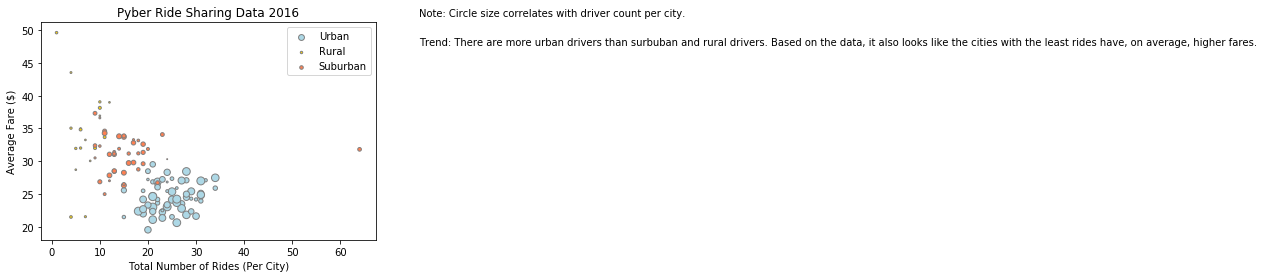

In [128]:
c1="lightblue" 
c2="gold"
c3="coral"
edge = ["grey"]
plt.scatter(x=urban_ride, y=urban_fare, s=urban_drive*.90, c=c1, marker='o', edgecolors=edge, alpha=1, label='Urban') 
plt.scatter(x=rural_ride, y=rural_fare, s=rural_drive*.90, c=c2, marker='o', edgecolors=edge, alpha=1, label='Rural')
plt.scatter(x=suburban_ride, y=suburban_fare, s=suburban_drive*.90, c=c3, marker='o', edgecolors=edge, alpha=1, label='Suburban') 
plt.legend()

# Titles and grids
plt.title("Pyber Ride Sharing Data 2016")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
# BOTTOM LABEL
plt.figtext(1,0.9, "Note: Circle size correlates with driver count per city.", fontsize=10)

#Trend
plt.figtext(1,0.8, "Trend: There are more urban drivers than surbuban and rural drivers. Based on the data, it also looks like the cities with the least rides have, on average, higher fares.", fontsize=10)
# Print Scatter Plot
plt.show()

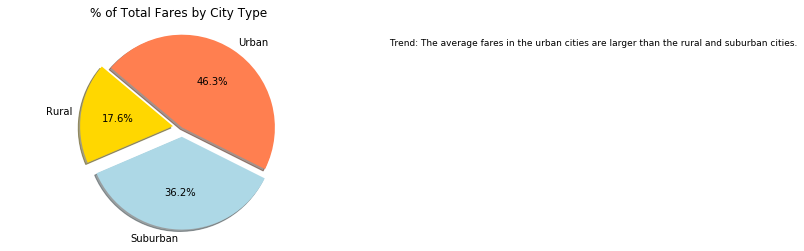

In [129]:
# Labels for the sections of our pie chart
labels = "Rural", "Suburban", "Urban"

# The values of each section of the pie chart
sum_rural= rural_fare.sum()
sum_urban= urban_fare.sum()
sum_sub= suburban_fare.sum()
sizes = [sum_rural, sum_sub, sum_urban]

# The colors of each section of the pie chart
colors = ["gold", "lightblue", "coral"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0.1, 0.1, 0, )

# Automatically finds the percentages of each part of the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

# Tells matplotlib that we want a pie chart with equal axes
plt.axis("equal")

#Title
plt.title("% of Total Fares by City Type")

# Trend
plt.figtext(1,0.8, "Trend: The average fares in the urban cities are larger than the rural and suburban cities.", fontsize=9)

# Prints our pie chart to the screen
plt.show()

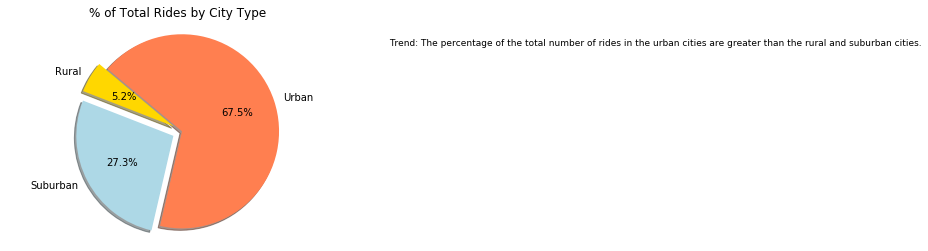

In [130]:
# Labels for the sections of our pie chart
labels = "Rural", "Suburban", "Urban"

# The values of each section of the pie chart
sum_rural= rural_ride.sum()
sum_urban= urban_ride.sum()
sum_sub= suburban_ride.sum()
sizes = [sum_rural, sum_sub, sum_urban]

# The colors of each section of the pie chart
colors = ["gold", "lightblue", "coral"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0.1, 0.1, 0,)

# Automatically finds the percentages of each part of the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

# Tells matplotlib that we want a pie chart with equal axes
plt.axis("equal")

# Trend
plt.figtext(1,0.8, "Trend: The percentage of the total number of rides in the urban cities are greater than the rural and suburban cities.", fontsize=9)

#Title
plt.title("% of Total Rides by City Type")

# Prints our pie chart to the screen
plt.show()

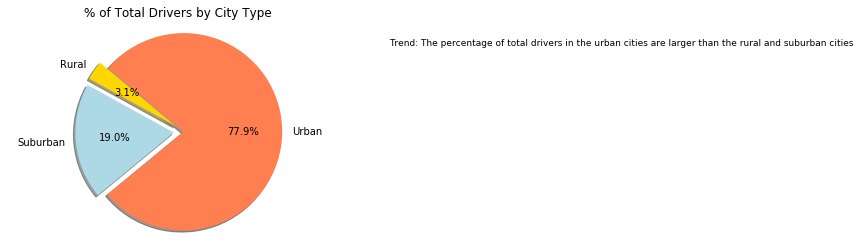

In [131]:
# Labels for the sections of our pie chart
labels = "Rural", "Suburban", "Urban"

# The values of each section of the pie chart
sum_rural= rural_drive.sum()
sum_urban= urban_drive.sum()
sum_sub= suburban_drive.sum()
sizes = [sum_rural, sum_sub, sum_urban]

# The colors of each section of the pie chart
colors = ["gold", "lightblue", "coral"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0.1, 0.1, 0,)

# Automatically finds the percentages of each part of the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

# Tells matplotlib that we want a pie chart with equal axes
plt.axis("equal")

# Trend
plt.figtext(1,0.8, "Trend: The percentage of total drivers in the urban cities are larger than the rural and suburban cities", fontsize=9)

#Title
plt.title("% of Total Drivers by City Type")

# Prints our pie chart to the screen
plt.show()